In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

In [2]:
X0 = np.random.uniform(-1,1, size=8)
# print(X0)
chg = 0.01
j = 1
h = 0.01
t = np.arange(0,5000, chg)

In [3]:
# increased matrix dimensions to represent larger system
def genMatrix():
    a = np.random.uniform(-0.5,0.5, size=(8,8))
    np.fill_diagonal(a, np.random.uniform(-1,-0.0000000001))
    
    return a

In [68]:
def dUdt_2(X0, chg, t, j, h, a):

    
    det_list = []
    det = np.linalg.det(a)
    det_list.append(det)
    

    x = np.zeros((len(t),8))
    x_dot = np.zeros((len(t),8))
    x_dot_dot = np.zeros((len(t),8))

    counter = 0
    counter_for_regen = 0
    
    # Initialise initial conditions
    x[0] = X0
    
    x_dot[0] = np.zeros(8)
    x_dot_dot[0] = np.zeros(8)

    

    for i, _ in enumerate(t[1:],start=1):
        x_dot_dot[i] = -j * x_dot[i-1] + h * (a @ x[i-1])
        x_dot[i] = x_dot[i-1] + (x_dot_dot[i-1])*chg
        x[i] = x[i-1] + x_dot[i-1]*chg

        det_list.append(np.linalg.det(a))

        if t[i] == 2000:
            x[i][2] += 10

        if sum(x[i]) > 4 or sum(x[i]) < -4:
            if counter % 500 == 0:
                a = genMatrix()
                det = np.linalg.det(a)
                counter_for_regen +=1

            while det < 0 or det > 0.25:
                a = genMatrix()
                det = np.linalg.det(a)
                # print("gen")
                
                
                
                # det = np.linalg.det(a)
                
        counter += 1
    
    return x, x_dot, x_dot_dot, det_list, counter_for_regen
    # return counter_for_regen

In [67]:
a = genMatrix()
det_a=np.linalg.det(a)
print(det_a)

0.00035963455283882057


In [69]:
x_2, x_dot_2, x_dot_dot_2, det_list_2, num_new_matrix = dUdt_2(X0, chg, t, j, h, a)

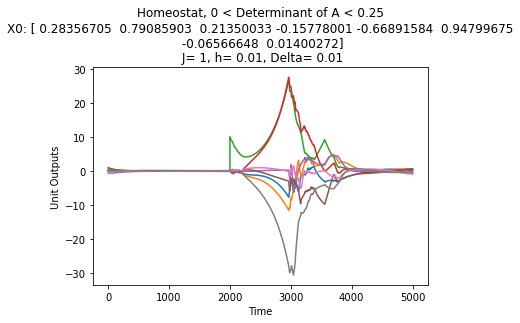

In [70]:
plt.plot(t, x_2)
plt.ylabel('Unit Outputs')
plt.xlabel('Time')
plt.title(f'Homeostat, 0 < Determinant of A < 0.25\nX0: {X0}\n J= {j}, h= {h}, Delta= {chg}')
# plt.plot(t, x_dot)
plt.show()

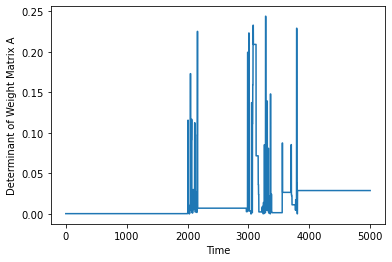

101


In [71]:
# print(det_list_2[400000])
plt.plot(t,det_list_2)
plt.ylabel('Determinant of Weight Matrix A')
plt.xlabel('Time')
plt.show()
print(num_new_matrix)